In [3]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [4]:
df = pd.read_csv('D:diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [21]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

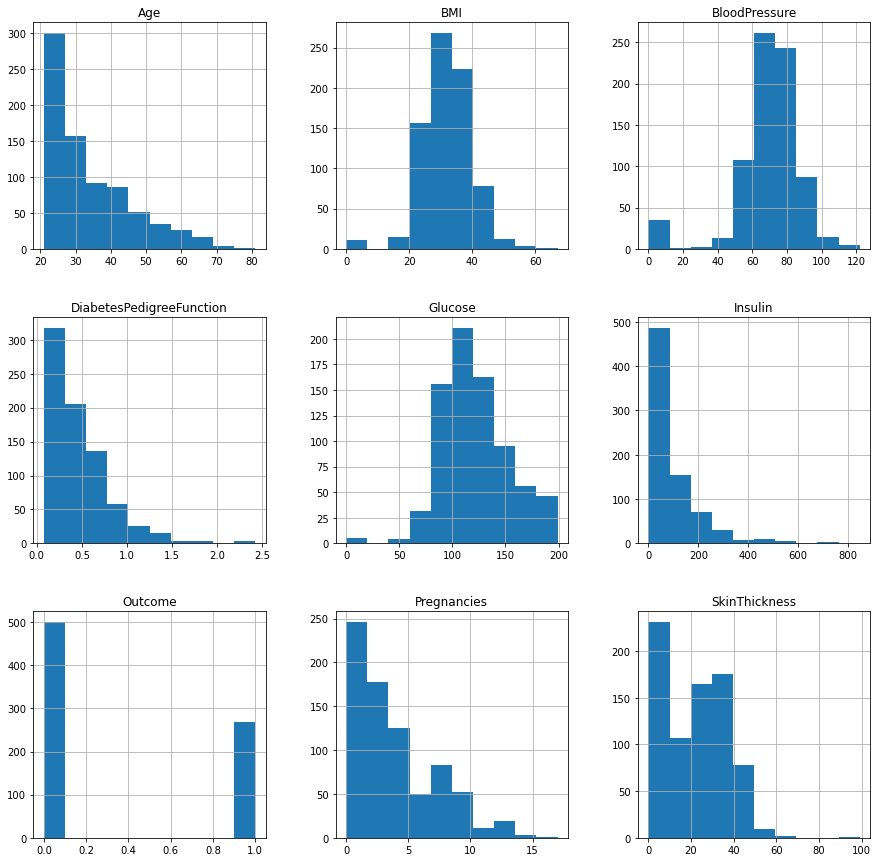

In [24]:
# To fill the missing values the data destribution needs to be understand
p= df.hist(figsize=(15,15))

In [19]:
# by seeing the histogram we can see ,where the value of 0 was very high the missing value was replace by median and 
# where the value of 0 was less that place was replace by mean 

In [25]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [26]:
df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['BloodPressure'] = df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean())
df_copy['SkinThickness'] = df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median())
df_copy['Insulin'] = df_copy['Insulin'].fillna(df_copy['Insulin'].median())
df_copy['BMI'] = df_copy['BMI'].fillna(df_copy['BMI'].median())





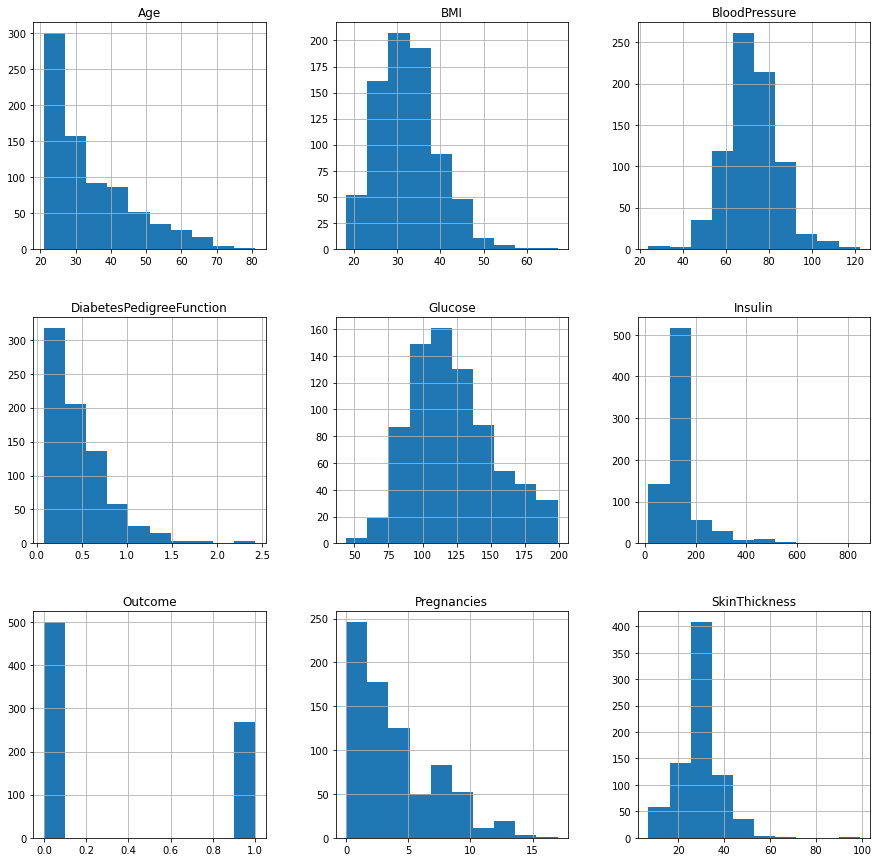

In [27]:
p = df_copy.hist(figsize=(15,15))

In [29]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
df_copy.shape

(768, 9)

In [35]:
df['Pregnancies'] = df['Pregnancies'].apply(pd.to_numeric)

In [38]:
# seeing the datatypes inside the data 
sns.countplot(y=df.dtypes,data=df)

plt.xlabel('Count of each datatype')
plt.ylabel("datatypes")
plt.show()

TypeError: data type "Pregnancies" not understood

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
import missingno as msso

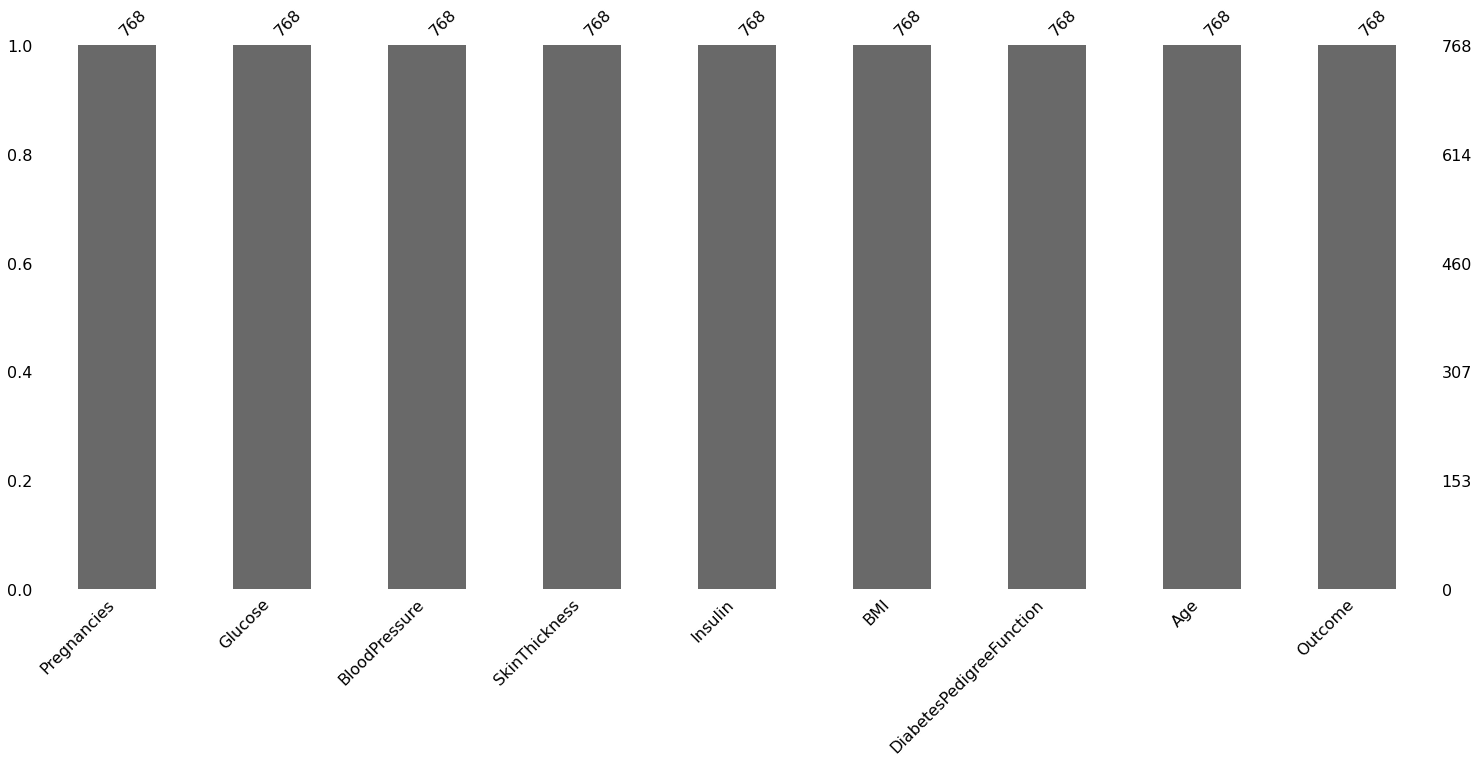

In [44]:
p = msso.bar(df_copy)

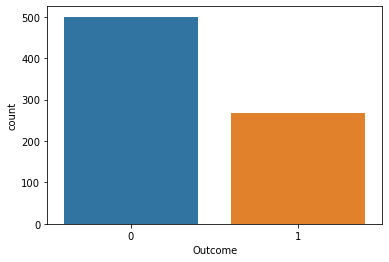

In [48]:
sns.countplot(x='Outcome',data=df_copy)
plt.show()

In [49]:
df_copy.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [51]:
from pandas.plotting import scatter_matrix

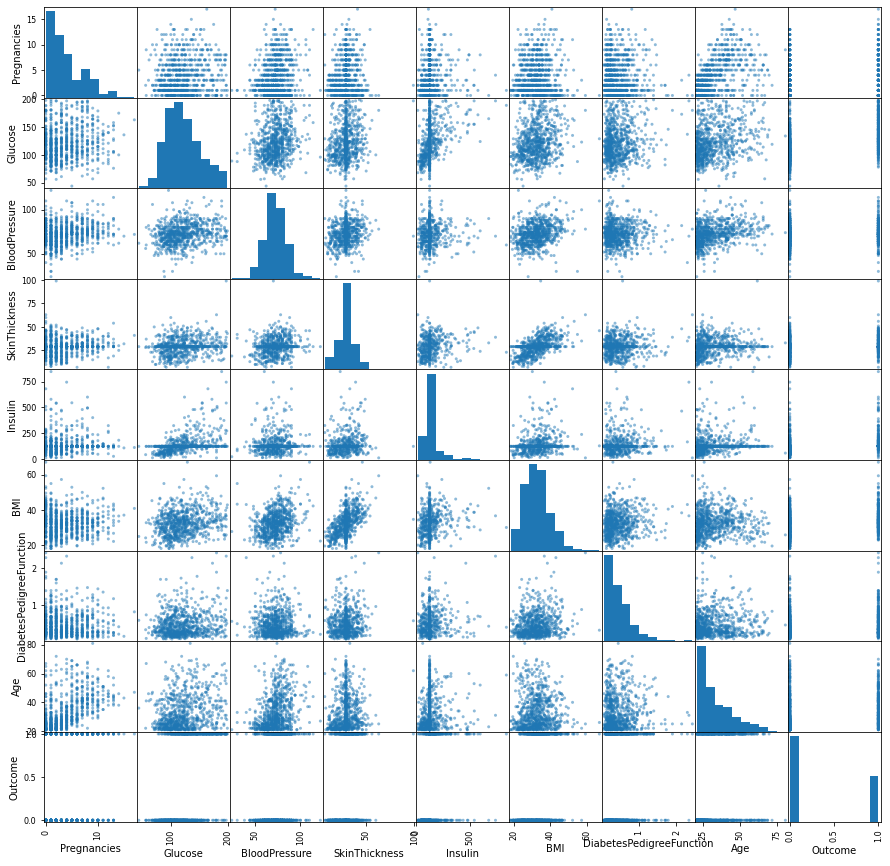

In [53]:
scatter_matrix(df_copy,figsize=(15,15))
plt.show()

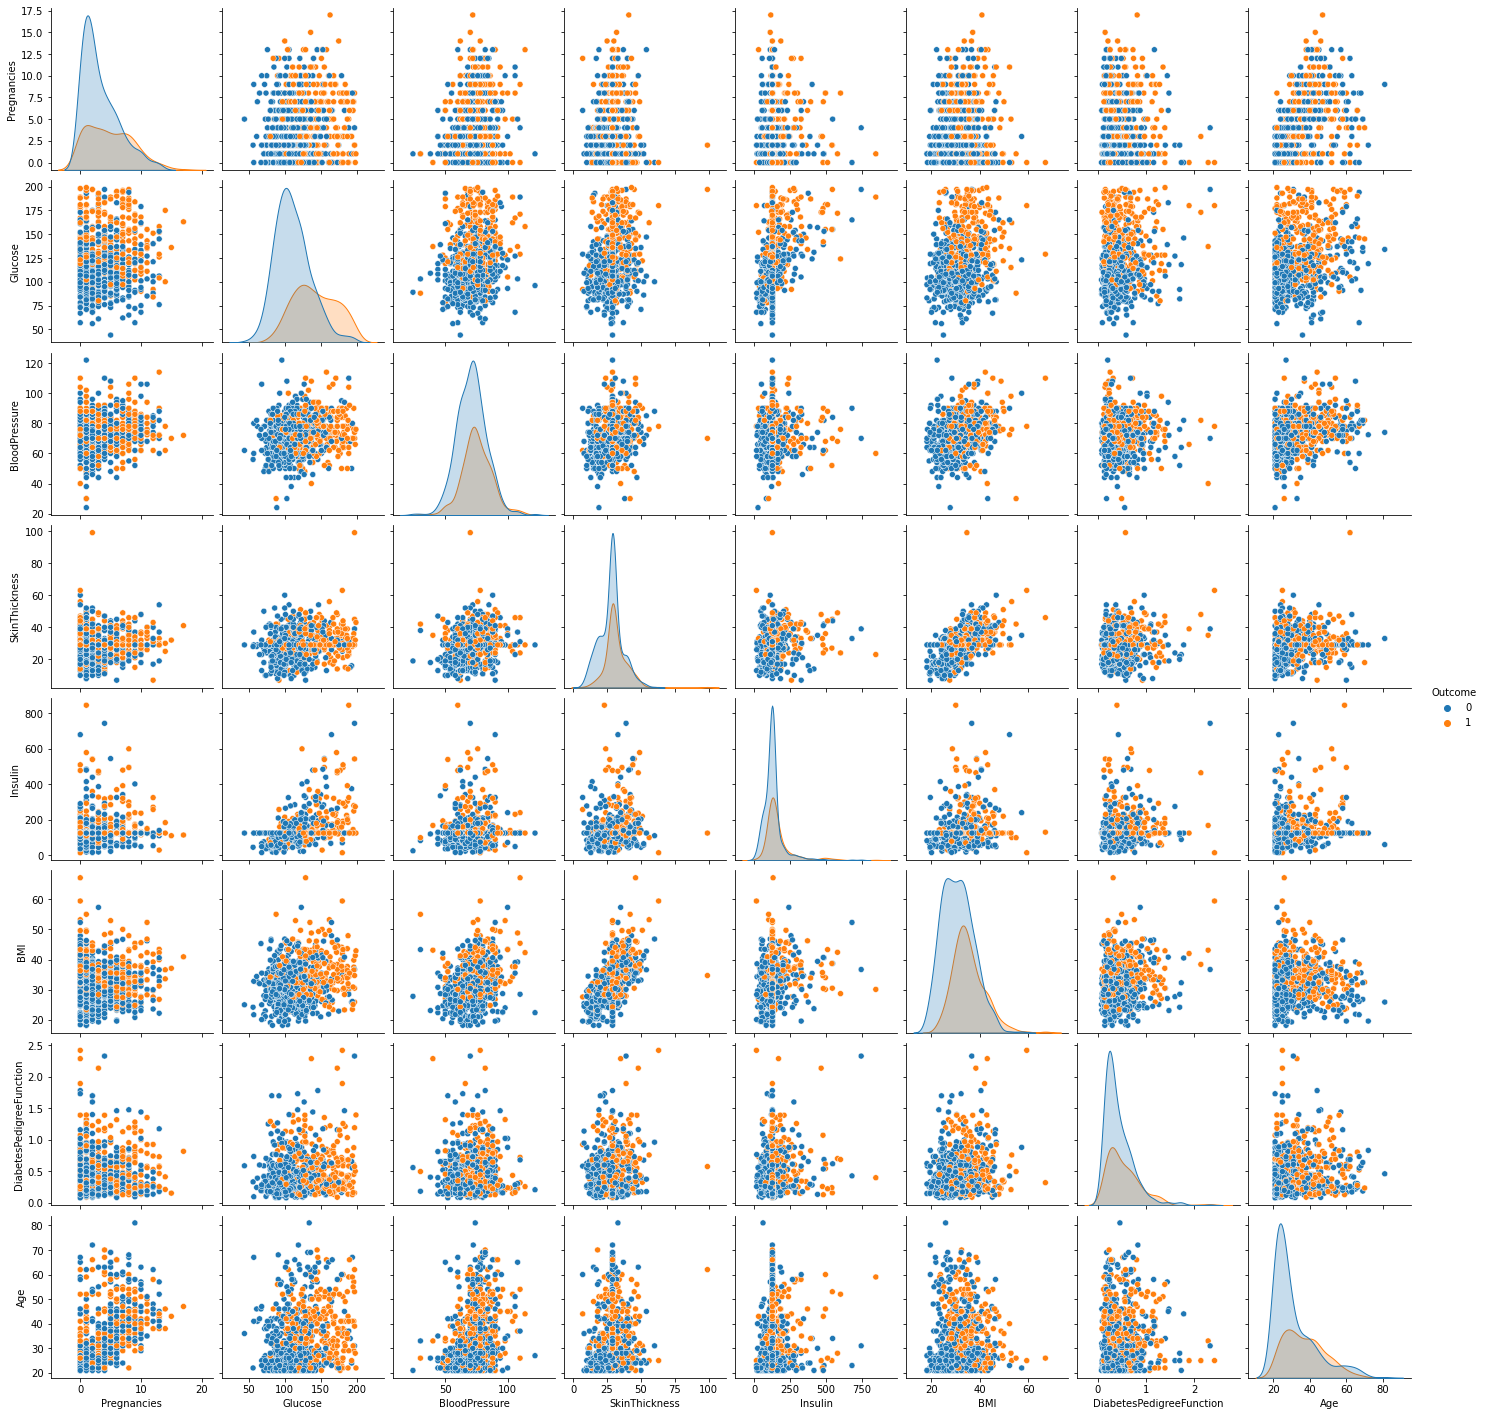

In [56]:
sns.pairplot(df_copy,hue='Outcome')
plt.show()

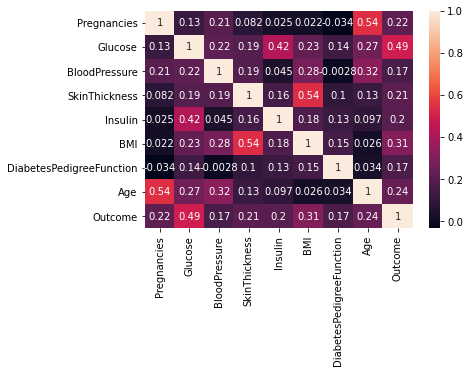

In [59]:
sns.heatmap(df_copy.corr(),annot=True)
plt.show()

In [61]:
# scaling the data 
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [62]:
X = df_copy.iloc[:,:-1].values
y = df_copy.iloc[:,-1].values

In [69]:
from imblearn.over_sampling import SMOTE

In [71]:
smote = SMOTE()
X_new , y_new = smote.fit_resample(X,y)

In [75]:
sd = pd.DataFrame(y_new)
sd[0].value_counts()
# now our data will be trained for equal no. of classes

1    500
0    500
Name: 0, dtype: int64

In [76]:
sc = StandardScaler()

In [77]:
X_ = sc.fit_transform(X_new)

In [78]:
from sklearn.model_selection import cross_val_score

In [84]:
for i in range (1,15):
    model = KNeighborsClassifier(n_neighbors=i)
    print("for neighbours = ",i,cross_val_score(model,X_,y_new,cv=5).mean())
    print("__________________________________________")
    

for neighbours =  1 0.7749999999999999
__________________________________________
for neighbours =  2 0.767
__________________________________________
for neighbours =  3 0.779
__________________________________________
for neighbours =  4 0.774
__________________________________________
for neighbours =  5 0.774
__________________________________________
for neighbours =  6 0.787
__________________________________________
for neighbours =  7 0.7779999999999999
__________________________________________
for neighbours =  8 0.785
__________________________________________
for neighbours =  9 0.7849999999999999
__________________________________________
for neighbours =  10 0.785
__________________________________________
for neighbours =  11 0.7869999999999999
__________________________________________
for neighbours =  12 0.786
__________________________________________
for neighbours =  13 0.773
__________________________________________
for neighbours =  14 0.7830000000000001
_______

In [82]:
# Testing Score came maximum for neighbours = 11

0.774

In [85]:
from sklearn.metrics import classification_report

In [89]:
model1 = KNeighborsClassifier(n_neighbors=11)
model1.fit(X_,y_new)

KNeighborsClassifier(n_neighbors=11)

In [95]:
print(classification_report(y_new,model.predict(X_)))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       500
           1       0.80      0.87      0.83       500

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
print(confusion_matrix(y_new,model.predict(X_)))

[[391 109]
 [ 66 434]]


In [98]:
from sklearn.metrics import f1_score

In [99]:
f1_score(y_new,model.predict(X_),average=None)
# this shows that the model is 81% correctly predicting for class 0 and 83% for class 1

array([0.81713689, 0.83221477])

Text(33.0, 0.5, 'Actual label')

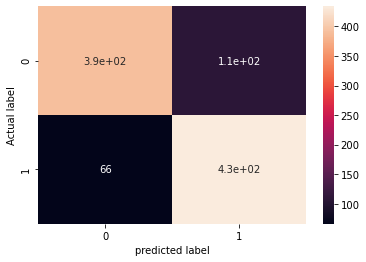

In [105]:
from sklearn import metrics
sd = metrics.confusion_matrix(y_new,model.predict(X_))
p=sns.heatmap(pd.DataFrame(sd),annot=True)
plt.xlabel("predicted label")
plt.ylabel('Actual label')